In [1053]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import requests
import json
import os

In [1054]:
os.chdir('C:\\PythonCourse\\datasets\\project')

## Load the data

In [1055]:
r = requests.get("https://data.gov.il/api/3/action/datastore_search?resource_id=e83f763b-b7d7-479e-b172-ae981ddc6de5&limit=5000")
res = json.loads(r.content)
df = pd.DataFrame(res['result']['records'])

In [1056]:
df.shape

(2262, 18)

1. display the first rows 

In [1057]:
df.head(10)

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
0,1,UA,954,UNITED AIRLINES,2023-02-17T23:20:00,2023-02-17T22:53:00,A,SFO,SAN FRANCISCO,סן פרנסיסקו,SAN FRANCISCO,ארצות הברית,UNITED STATES,3,,,LANDED,נחתה
1,2,AA,8778,AMERICAN AIRLINES,2023-02-17T23:00:00,2023-02-17T22:55:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,,,LANDED,נחתה
2,3,IB,3316,IBERIA,2023-02-17T23:00:00,2023-02-17T22:55:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,,,LANDED,נחתה
3,4,LY,8396,EL AL ISRAEL AIRLINES,2023-02-17T23:00:00,2023-02-17T22:55:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,,,LANDED,נחתה
4,5,VY,5269,VUELING AIRLINES S.A.,2023-02-17T23:00:00,2023-02-17T22:55:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,,,LANDED,נחתה
5,6,RJ,340,ROYAL JORDANIAN,2023-02-17T22:45:00,2023-02-17T22:58:00,A,AMM,AMMAN (QUEEN ALIA INT'L),עמאן,AMMAN,ירדן,JORDAN,3,,,LANDED,נחתה
6,7,EK,2450,EMIRATES,2023-02-17T23:00:00,2023-02-17T22:59:00,A,DXB,DUBAI,דובאי,DUBAI,איחוד האמירויות הערב,UNITED ARAB EMIRATES,3,,,LANDED,נחתה
7,8,FZ,1625,FLYDUBAI,2023-02-17T23:00:00,2023-02-17T22:59:00,A,DXB,DUBAI,דובאי,DUBAI,איחוד האמירויות הערב,UNITED ARAB EMIRATES,3,,,LANDED,נחתה
8,9,LH,690,LUFTHANSA,2023-02-17T23:00:00,2023-02-17T23:00:00,A,FRA,FRANKFURT,פרנקפורט,FRANKFURT,גרמניה,GERMANY,3,,,CANCELED,מבוטלת
9,10,NH,5461,ALL NIPPON AIRWAYS,2023-02-17T23:00:00,2023-02-17T23:00:00,A,FRA,FRANKFURT,פרנקפורט,FRANKFURT,גרמניה,GERMANY,3,,,CANCELED,מבוטלת


2. display the last 10 rows

In [1058]:
df.tail(10)

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
2252,2253,,,,2023-02-20T10:40:00,2023-02-20T12:40:00,,,,,,,,,,,,
2253,2254,,,,2023-02-19T09:00:00,2023-02-19T11:00:00,,,,,,,,,,,,
2254,2255,,,,2023-02-19T01:35:00,2023-02-19T03:35:00,,,,,,,,,,,,
2255,2256,,,,2023-02-19T03:40:00,2023-02-19T05:40:00,,,,,,,,,,,,
2256,2257,,,,2023-02-20T21:45:00,2023-02-20T23:45:00,,,,,,,,,,,,
2257,2258,,,,2023-02-20T22:45:00,2023-02-21T00:45:00,,,,,,,,,,,,
2258,2259,,,,2023-02-19T04:00:00,2023-02-19T06:00:00,,,,,,,,,,,,
2259,2260,,,,2023-02-19T08:00:00,2023-02-19T10:00:00,,,,,,,,,,,,
2260,2261,,,,2023-02-21T13:00:00,2023-02-21T15:00:00,,,,,,,,,,,,
2261,2262,,,,2023-02-21T14:30:00,2023-02-21T16:30:00,,,,,,,,,,,,


## clean the data

1. how many rows contains empty strings for each Column? (use a for loop to display the column name and percentage)

In [1059]:
for (columnName, columnData) in df.items():
    cnt=0
    for value in columnData.values:
        if value =='':
            cnt+=1
    print('Column ', columnName, 'contains', cnt, ' empty values, which is ', round(cnt/len(df)*100,2), ' %')

Column  _id contains 0  empty values, which is  0.0  %
Column  CHOPER contains 16  empty values, which is  0.71  %
Column  CHFLTN contains 16  empty values, which is  0.71  %
Column  CHOPERD contains 16  empty values, which is  0.71  %
Column  CHSTOL contains 0  empty values, which is  0.0  %
Column  CHPTOL contains 0  empty values, which is  0.0  %
Column  CHAORD contains 16  empty values, which is  0.71  %
Column  CHLOC1 contains 16  empty values, which is  0.71  %
Column  CHLOC1D contains 16  empty values, which is  0.71  %
Column  CHLOC1TH contains 16  empty values, which is  0.71  %
Column  CHLOC1T contains 16  empty values, which is  0.71  %
Column  CHLOC1CH contains 16  empty values, which is  0.71  %
Column  CHLOCCT contains 16  empty values, which is  0.71  %
Column  CHTERM contains 16  empty values, which is  0.71  %
Column  CHCINT contains 1738  empty values, which is  76.83  %
Column  CHCKZN contains 1738  empty values, which is  76.83  %
Column  CHRMINE contains 16  empty 

2. drop the empty rows  

In [1060]:
df[df['CHCINT']==''].index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2252, 2253, 2254, 2255, 2256, 2257, 2258, 2259, 2260, 2261],
           dtype='int64', length=1738)

In [1061]:
df = df.drop(df[df['CHCINT']==''].index, axis=0, inplace=False)

In [1062]:
df

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
22,23,AA,053,AMERICAN AIRLINES,2023-02-17T23:15:00,2023-02-17T23:24:00,D,MIA,MIAMI INTERNATIONAL,מיאמי,MIAMI,ארצות הברית,UNITED STATES,3,56-65,C,DEPARTED,המריאה
23,24,UA,091,UNITED AIRLINES,2023-02-17T23:10:00,2023-02-17T23:27:00,D,EWR,NEW YORK - NEWARK,ניוארק,NEWARK,ארצות הברית,UNITED STATES,3,12-18,A,DEPARTED,המריאה
26,27,RJ,341,ROYAL JORDANIAN,2023-02-17T23:30:00,2023-02-17T23:59:00,D,AMM,AMMAN (QUEEN ALIA INT'L),עמאן,AMMAN,ירדן,JORDAN,3,70-73,C,DEPARTED,המריאה
27,28,DL,235,DELTA AIRLINES,2023-02-17T23:55:00,2023-02-18T00:08:00,D,JFK,NEW YORK - J.F.KENNEDY,ניו יורק,NEW YORK,ארצות הברית,UNITED STATES,3,46-55,B,DEPARTED,המריאה
29,30,AY,1980,FINNAIR,2023-02-17T23:55:00,2023-02-18T00:16:00,D,HEL,HELSINKI,הלסינקי,HELSINKI,פינלנד,FINLAND,3,74-77,C,DEPARTED,המריאה
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,1171,JU,8256,AIR SERBIA,2023-02-20T01:00:00,2023-02-20T01:00:00,D,IST,ISTANBUL,איסטנבול,ISTANBUL,טורקיה,TURKEY,3,34-38,B,ON TIME,בזמן
1171,1172,LY,017,EL AL ISRAEL AIRLINES,2023-02-20T01:00:00,2023-02-20T01:00:00,D,MIA,MIAMI INTERNATIONAL,מיאמי,MIAMI,ארצות הברית,UNITED STATES,3,78-99,D,ON TIME,בזמן
1172,1173,LY,027,EL AL ISRAEL AIRLINES,2023-02-20T01:00:00,2023-02-20T01:00:00,D,EWR,NEW YORK - NEWARK,ניוארק,NEWARK,ארצות הברית,UNITED STATES,3,78-99,D,ON TIME,בזמן
1173,1174,TK,791,TURKISH AIRLINES,2023-02-20T01:00:00,2023-02-20T01:00:00,D,IST,ISTANBUL,איסטנבול,ISTANBUL,טורקיה,TURKEY,3,34-38,B,ON TIME,בזמן


In [1063]:
for (columnName, columnData) in df.items():
    cnt=0
    for value in columnData.values:
        if value =='':
            cnt+=1
    print('Column ', columnName, 'contains', cnt, ' empty values, which is ', round(cnt/len(df)*100,2), ' %')

Column  _id contains 0  empty values, which is  0.0  %
Column  CHOPER contains 0  empty values, which is  0.0  %
Column  CHFLTN contains 0  empty values, which is  0.0  %
Column  CHOPERD contains 0  empty values, which is  0.0  %
Column  CHSTOL contains 0  empty values, which is  0.0  %
Column  CHPTOL contains 0  empty values, which is  0.0  %
Column  CHAORD contains 0  empty values, which is  0.0  %
Column  CHLOC1 contains 0  empty values, which is  0.0  %
Column  CHLOC1D contains 0  empty values, which is  0.0  %
Column  CHLOC1TH contains 0  empty values, which is  0.0  %
Column  CHLOC1T contains 0  empty values, which is  0.0  %
Column  CHLOC1CH contains 0  empty values, which is  0.0  %
Column  CHLOCCT contains 0  empty values, which is  0.0  %
Column  CHTERM contains 0  empty values, which is  0.0  %
Column  CHCINT contains 0  empty values, which is  0.0  %
Column  CHCKZN contains 0  empty values, which is  0.0  %
Column  CHRMINE contains 0  empty values, which is  0.0  %
Column  

In [1064]:
# checking that no empty rows left

3. format the current date with underscore separation (%d_%m_%y)

In [1065]:
x = datetime.date.today()

In [1066]:
x

datetime.date(2023, 2, 18)

In [1067]:
d=x.day

In [1068]:
m=x.month

In [1069]:
y=x.year

In [1070]:
cur_date = '_'+ str(d) + '_' + str(m) + '_' + str(y)

In [1072]:
cur_date

'_18_2_2023'

4. Drop the _id column 

In [1073]:
df.drop(['_id'], axis=1, inplace=True)

In [1074]:
df.count()

CHOPER      524
CHFLTN      524
CHOPERD     524
CHSTOL      524
CHPTOL      524
CHAORD      524
CHLOC1      524
CHLOC1D     524
CHLOC1TH    524
CHLOC1T     524
CHLOC1CH    524
CHLOCCT     524
CHTERM      524
CHCINT      524
CHCKZN      524
CHRMINE     524
CHRMINH     524
dtype: int64

5. save the raw data (add the current date to the file name) 

In [1075]:
file_name = 'flights' + cur_date + '.csv'

In [1076]:
file_name

'flights_18_2_2023.csv'

In [1077]:
df.to_csv(file_name)

6. select the airline code and name without duplicates (CHOPER,CHOPERD)

In [1078]:
newdf = df.groupby(['CHOPER','CHOPERD']).last().reset_index()

In [1079]:
newdf

,CHOPER,CHOPERD,CHFLTN,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
0,5F,FLYONE,448,2023-02-19T15:15:00,2023-02-19T15:15:00,D,KIV,CHISINAU,קישינב,CHISINAU,מולדוביה,MOLDOVA,3,1-4,A,ON TIME,בזמן
1,5W,WIZZ AIR ABU DHABI,7090,2023-02-19T22:10:00,2023-02-19T22:10:00,D,AUH,ABU DHABI,אבו דאבי,ABU DHABI,איחוד האמירויות הערב,UNITED ARAB EMIRATES,3,71-74,C,ON TIME,בזמן
2,6H,ISRAIR AIRLINES,891,2023-02-19T20:00:00,2023-02-19T20:00:00,D,TBS,TBILISI,טביליסי,TBILISI,גיאורגיה,GEORGIA,1,338-341,B,ON TIME,בזמן
3,9U,AIR MOLDOVA,548,2023-02-19T23:50:00,2023-02-19T23:50:00,D,KIV,CHISINAU,קישינב,CHISINAU,מולדוביה,MOLDOVA,3,26-28,A,ON TIME,בזמן
4,A3,AEGEAN AIRLINES,925,2023-02-19T20:10:00,2023-02-19T20:10:00,D,ATH,ATHENS,אתונה,ATHENS,יוון,GREECE,3,56-59,C,ON TIME,בזמן
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,W6,WIZZAIR,8204,2023-02-19T22:20:00,2023-02-19T22:20:00,D,CTA,CATANIA FONTANAROSSA,קטאניה,CATANIA,איטליה,ITALY,1,303-312,A,ON TIME,בזמן
71,W9,WIZZ UK,4452,2023-02-19T21:55:00,2023-02-19T21:55:00,D,LTN,LUTON,לונדון לוטון,LONDON LUTON,בריטניה,UNITED KINGDOM,1,303-312,A,ON TIME,בזמן
72,WZ,RED WINGS AIRLINES,016,2023-02-18T16:55:00,2023-02-18T17:21:00,D,MRV,MINERALNYE VODY,מינראל וודי,MINERALNYE VODY,רוסיה,RUSSIAN FEDERATION,3,1-3,A,DEPARTED,המריאה
73,XC,CORONDON AIRLINES,456,2023-02-19T12:40:00,2023-02-19T12:40:00,D,AYT,ANTALYA,אנטליה,ANTALYA,טורקיה,TURKEY,3,66-68,C,ON TIME,בזמן


7. Load the file airlines.csv and merge it with a new data and save the file 'airline.csv'

In [1080]:
airlines = pd.read_csv('airlines.csv')

In [1081]:
airlines.head()

,CHOPER,CHOPERD
0,PC,PEGASUS AIRLINES
1,LY,EL AL ISRAEL AIRLINES
2,TK,TURKISH AIRLINES
3,LX,SWISS INT`L AIRLINES
4,FB,BULGARIA AIR


In [1082]:
airlines.shape

(100, 2)

In [1083]:
# syntax of MERGE:            result = pd.merge(left, right, on=["key1", "key2"])

In [1084]:
new_airlines = pd.merge(airlines, newdf, on=['CHOPER','CHOPERD'])

In [1085]:
new_airlines.head()

,CHOPER,CHOPERD,CHFLTN,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
0,PC,PEGASUS AIRLINES,782,2023-02-19T18:25:00,2023-02-19T18:25:00,D,SAW,ISTANBUL-SABIHA GOKCHEN,איסטנבול,ISTANBUL,טורקיה,TURKEY,3,16-19,A,ON TIME,בזמן
1,LY,EL AL ISRAEL AIRLINES,027,2023-02-20T01:00:00,2023-02-20T01:00:00,D,EWR,NEW YORK - NEWARK,ניוארק,NEWARK,ארצות הברית,UNITED STATES,3,78-99,D,ON TIME,בזמן
2,TK,TURKISH AIRLINES,791,2023-02-20T01:00:00,2023-02-20T01:00:00,D,IST,ISTANBUL,איסטנבול,ISTANBUL,טורקיה,TURKEY,3,34-38,B,ON TIME,בזמן
3,LX,SWISS INT`L AIRLINES,253,2023-02-19T18:20:00,2023-02-19T18:20:00,D,ZRH,ZURICH,ציריך,ZURICH,שוויץ,SWITZERLAND,3,24-33,A,ON TIME,בזמן
4,FB,BULGARIA AIR,574,2023-02-19T07:30:00,2023-02-19T07:30:00,D,SOF,SOFIA,סופיה,SOFIA,בולגריה,BULGARIA,3,41-43,B,ON TIME,בזמן


In [1086]:
new_airlines.shape # it's now less rows, than in original 'airlines' dataset - the topic for additional research

(62, 17)

In [1087]:
new_airlines.to_csv('airlines.csv')

8. Drop the Airline name column 

In [1088]:
newdf = newdf.drop('CHOPERD', axis=1, inplace=False)

In [1089]:
newdf

,CHOPER,CHFLTN,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
0,5F,448,2023-02-19T15:15:00,2023-02-19T15:15:00,D,KIV,CHISINAU,קישינב,CHISINAU,מולדוביה,MOLDOVA,3,1-4,A,ON TIME,בזמן
1,5W,7090,2023-02-19T22:10:00,2023-02-19T22:10:00,D,AUH,ABU DHABI,אבו דאבי,ABU DHABI,איחוד האמירויות הערב,UNITED ARAB EMIRATES,3,71-74,C,ON TIME,בזמן
2,6H,891,2023-02-19T20:00:00,2023-02-19T20:00:00,D,TBS,TBILISI,טביליסי,TBILISI,גיאורגיה,GEORGIA,1,338-341,B,ON TIME,בזמן
3,9U,548,2023-02-19T23:50:00,2023-02-19T23:50:00,D,KIV,CHISINAU,קישינב,CHISINAU,מולדוביה,MOLDOVA,3,26-28,A,ON TIME,בזמן
4,A3,925,2023-02-19T20:10:00,2023-02-19T20:10:00,D,ATH,ATHENS,אתונה,ATHENS,יוון,GREECE,3,56-59,C,ON TIME,בזמן
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,W6,8204,2023-02-19T22:20:00,2023-02-19T22:20:00,D,CTA,CATANIA FONTANAROSSA,קטאניה,CATANIA,איטליה,ITALY,1,303-312,A,ON TIME,בזמן
71,W9,4452,2023-02-19T21:55:00,2023-02-19T21:55:00,D,LTN,LUTON,לונדון לוטון,LONDON LUTON,בריטניה,UNITED KINGDOM,1,303-312,A,ON TIME,בזמן
72,WZ,016,2023-02-18T16:55:00,2023-02-18T17:21:00,D,MRV,MINERALNYE VODY,מינראל וודי,MINERALNYE VODY,רוסיה,RUSSIAN FEDERATION,3,1-3,A,DEPARTED,המריאה
73,XC,456,2023-02-19T12:40:00,2023-02-19T12:40:00,D,AYT,ANTALYA,אנטליה,ANTALYA,טורקיה,TURKEY,3,66-68,C,ON TIME,בזמן


9. Do the same task with airports (CHLOC1,CHLOC1D) and save the file 'airports.csv'

In [1090]:
airports = pd.read_csv('airports.csv')

In [1091]:
airports.head()

,CHLOC1,CHLOC1D
0,SAW,ISTANBUL-SABIHA GOKCHEN
1,PRG,PRAGUE-RUZYNE
2,IST,ISTANBUL
3,ZRH,ZURICH
4,SOF,SOFIA


In [1092]:
airports.shape

(165, 2)

In [1093]:
new_airports = pd.merge(airports, newdf, on=['CHLOC1','CHLOC1D'])

In [1094]:
new_airports.head()

,CHLOC1,CHLOC1D,CHOPER,CHFLTN,CHSTOL,CHPTOL,CHAORD,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
0,SAW,ISTANBUL-SABIHA GOKCHEN,PC,782,2023-02-19T18:25:00,2023-02-19T18:25:00,D,איסטנבול,ISTANBUL,טורקיה,TURKEY,3,16-19,A,ON TIME,בזמן
1,PRG,PRAGUE-RUZYNE,OK,5289,2023-02-19T05:35:00,2023-02-19T05:35:00,D,פראג,PRAGUE,צ'כיה,CZECH REPUBLIC,3,41-43,B,ON TIME,בזמן
2,PRG,PRAGUE-RUZYNE,QS,1287,2023-02-19T05:35:00,2023-02-19T05:35:00,D,פראג,PRAGUE,צ'כיה,CZECH REPUBLIC,3,41-43,B,ON TIME,בזמן
3,IST,ISTANBUL,B6,6909,2023-02-19T10:30:00,2023-02-19T10:30:00,D,איסטנבול,ISTANBUL,טורקיה,TURKEY,3,34-40,B,ON TIME,בזמן
4,IST,ISTANBUL,HM,6420,2023-02-20T01:00:00,2023-02-20T01:00:00,D,איסטנבול,ISTANBUL,טורקיה,TURKEY,3,34-38,B,ON TIME,בזמן


In [1095]:
new_airports.shape # less rows in resoulting dataset

(70, 16)

In [1096]:
new_airports.to_csv('airports.csv')

10. drop the hebrew columns 'CHLOC1TH','CHLOC1CH','CHRMINH'

In [1097]:
newdf = newdf.drop(['CHLOC1TH', 'CHLOC1CH', 'CHRMINH'], axis=1, inplace=False)

In [1098]:
newdf

,CHOPER,CHFLTN,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1T,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE
0,5F,448,2023-02-19T15:15:00,2023-02-19T15:15:00,D,KIV,CHISINAU,CHISINAU,MOLDOVA,3,1-4,A,ON TIME
1,5W,7090,2023-02-19T22:10:00,2023-02-19T22:10:00,D,AUH,ABU DHABI,ABU DHABI,UNITED ARAB EMIRATES,3,71-74,C,ON TIME
2,6H,891,2023-02-19T20:00:00,2023-02-19T20:00:00,D,TBS,TBILISI,TBILISI,GEORGIA,1,338-341,B,ON TIME
3,9U,548,2023-02-19T23:50:00,2023-02-19T23:50:00,D,KIV,CHISINAU,CHISINAU,MOLDOVA,3,26-28,A,ON TIME
4,A3,925,2023-02-19T20:10:00,2023-02-19T20:10:00,D,ATH,ATHENS,ATHENS,GREECE,3,56-59,C,ON TIME
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,W6,8204,2023-02-19T22:20:00,2023-02-19T22:20:00,D,CTA,CATANIA FONTANAROSSA,CATANIA,ITALY,1,303-312,A,ON TIME
71,W9,4452,2023-02-19T21:55:00,2023-02-19T21:55:00,D,LTN,LUTON,LONDON LUTON,UNITED KINGDOM,1,303-312,A,ON TIME
72,WZ,016,2023-02-18T16:55:00,2023-02-18T17:21:00,D,MRV,MINERALNYE VODY,MINERALNYE VODY,RUSSIAN FEDERATION,3,1-3,A,DEPARTED
73,XC,456,2023-02-19T12:40:00,2023-02-19T12:40:00,D,AYT,ANTALYA,ANTALYA,TURKEY,3,66-68,C,ON TIME


### rename the columns 

1. Change the PlanTime and ActualTime columns type to np.datetime64

In [1099]:
newdf = newdf.astype({'CHSTOL': np.datetime64,'CHPTOL': np.datetime64})

In [1101]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   CHOPER   75 non-null     object        
 1   CHFLTN   75 non-null     object        
 2   CHSTOL   75 non-null     datetime64[ns]
 3   CHPTOL   75 non-null     datetime64[ns]
 4   CHAORD   75 non-null     object        
 5   CHLOC1   75 non-null     object        
 6   CHLOC1D  75 non-null     object        
 7   CHLOC1T  75 non-null     object        
 8   CHLOCCT  75 non-null     object        
 9   CHTERM   75 non-null     object        
 10  CHCINT   75 non-null     object        
 11  CHCKZN   75 non-null     object        
 12  CHRMINE  75 non-null     object        
dtypes: datetime64[ns](2), object(11)
memory usage: 7.7+ KB


2. Save the clean data to new file clean.csv

In [1103]:
newdf.to_csv('cleandata.csv')

3. update the file final.csv with departed, landed and canceled flights only

In [1104]:
final = pd.read_csv('final.csv')

In [1105]:
final.head()

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,City,Country,Terminal,Status
0,LY,842,2022-03-07 16:00:00,2022-03-07 17:04:00,A,LGG,LIEGE,BELGIUM,3,LANDED
1,AA,146,2022-03-07 17:15:00,2022-03-07 17:05:00,A,JFK,NEW YORK,UNITED STATES,3,LANDED
2,USF,RCH18,2022-03-07 17:15:00,2022-03-07 17:05:00,D,RMS,RAMSTEIN,GERMANY,3,CANCELED
3,AHS,N120L,2022-03-07 16:30:00,2022-03-07 17:08:00,D,TEB,TETERBORO,UNITED STATES,3,DEPARTED
4,LH,687,2022-03-07 16:25:00,2022-03-07 17:09:00,D,FRA,FRANKFURT,GERMANY,3,DEPARTED


In [1106]:
final.shape

(658, 10)

In [1107]:
newdf[newdf['CHRMINE']=='DEPARTED']

,CHOPER,CHFLTN,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1T,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE
14,AY,1980,2023-02-17 23:55:00,2023-02-18 00:16:00,D,HEL,HELSINKI,HELSINKI,FINLAND,3,74-77,C,DEPARTED
20,CY,111,2023-02-18 14:10:00,2023-02-18 14:25:00,D,LCA,LARNACA,LARNACA,CYPRUS,3,53-55,B,DEPARTED
56,RR,9506,2023-02-18 15:50:00,2023-02-18 17:03:00,D,WRO,WROCLAW,WROCLAW,POLAND,3,69-72,C,DEPARTED
72,WZ,016,2023-02-18 16:55:00,2023-02-18 17:21:00,D,MRV,MINERALNYE VODY,MINERALNYE VODY,RUSSIAN FEDERATION,3,1-3,A,DEPARTED


In [1108]:
newdf[newdf['CHRMINE']=='CANCELED']

,CHOPER,CHFLTN,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1T,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE


In [1109]:
newdf[newdf['CHRMINE']=='LANDED']

,CHOPER,CHFLTN,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1T,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE


In [1110]:
newdf.CHRMINE.unique()

array(['ON TIME', 'DEPARTED'], dtype=object)

It seems that we have only the DEPARTURES data at the second I'm testing this task :)

In [1111]:
finaldf = newdf[newdf['CHRMINE'].isin(['DEPARTED', 'LANDED', 'CANCELED'])]

In [1112]:
finaldf

,CHOPER,CHFLTN,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1T,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE
14,AY,1980,2023-02-17 23:55:00,2023-02-18 00:16:00,D,HEL,HELSINKI,HELSINKI,FINLAND,3,74-77,C,DEPARTED
20,CY,111,2023-02-18 14:10:00,2023-02-18 14:25:00,D,LCA,LARNACA,LARNACA,CYPRUS,3,53-55,B,DEPARTED
56,RR,9506,2023-02-18 15:50:00,2023-02-18 17:03:00,D,WRO,WROCLAW,WROCLAW,POLAND,3,69-72,C,DEPARTED
72,WZ,016,2023-02-18 16:55:00,2023-02-18 17:21:00,D,MRV,MINERALNYE VODY,MINERALNYE VODY,RUSSIAN FEDERATION,3,1-3,A,DEPARTED


In [1113]:
final.head()

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,City,Country,Terminal,Status
0,LY,842,2022-03-07 16:00:00,2022-03-07 17:04:00,A,LGG,LIEGE,BELGIUM,3,LANDED
1,AA,146,2022-03-07 17:15:00,2022-03-07 17:05:00,A,JFK,NEW YORK,UNITED STATES,3,LANDED
2,USF,RCH18,2022-03-07 17:15:00,2022-03-07 17:05:00,D,RMS,RAMSTEIN,GERMANY,3,CANCELED
3,AHS,N120L,2022-03-07 16:30:00,2022-03-07 17:08:00,D,TEB,TETERBORO,UNITED STATES,3,DEPARTED
4,LH,687,2022-03-07 16:25:00,2022-03-07 17:09:00,D,FRA,FRANKFURT,GERMANY,3,DEPARTED


Now we need to add the rows from the 'finaldf' dataframe to the 'final' dataframe and save the resoult to the final.csv. 
But there is a different quantity of columns in the two dataframes and also the column names are different, so first needs to prepare the data.

In [1114]:
finaldf1 = finaldf.drop(['CHLOC1T', 'CHCINT', 'CHCKZN'], axis=1, inplace=False) #dropping columns we don't need

In [1115]:
finaldf1

,CHOPER,CHFLTN,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOCCT,CHTERM,CHRMINE
14,AY,1980,2023-02-17 23:55:00,2023-02-18 00:16:00,D,HEL,HELSINKI,FINLAND,3,DEPARTED
20,CY,111,2023-02-18 14:10:00,2023-02-18 14:25:00,D,LCA,LARNACA,CYPRUS,3,DEPARTED
56,RR,9506,2023-02-18 15:50:00,2023-02-18 17:03:00,D,WRO,WROCLAW,POLAND,3,DEPARTED
72,WZ,016,2023-02-18 16:55:00,2023-02-18 17:21:00,D,MRV,MINERALNYE VODY,RUSSIAN FEDERATION,3,DEPARTED


In [1117]:
pd.concat([final,finaldf1.rename(columns={'CHOPER':'Airline', 'CHFLTN':'FlightNum', 'CHSTOL':'PlanTime', 'CHPTOL':'ActualTime', 'CHAORD':'Direction', 'CHLOC1':'Airport', 'CHLOC1D':'City', 'CHLOCCT':'Country', 'CHTERM':'Terminal', 'CHRMINE':'Status' })], ignore_index=True)

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,City,Country,Terminal,Status
0,LY,842,2022-03-07 16:00:00,2022-03-07 17:04:00,A,LGG,LIEGE,BELGIUM,3,LANDED
1,AA,146,2022-03-07 17:15:00,2022-03-07 17:05:00,A,JFK,NEW YORK,UNITED STATES,3,LANDED
2,USF,RCH18,2022-03-07 17:15:00,2022-03-07 17:05:00,D,RMS,RAMSTEIN,GERMANY,3,CANCELED
3,AHS,N120L,2022-03-07 16:30:00,2022-03-07 17:08:00,D,TEB,TETERBORO,UNITED STATES,3,DEPARTED
4,LH,687,2022-03-07 16:25:00,2022-03-07 17:09:00,D,FRA,FRANKFURT,GERMANY,3,DEPARTED
...,...,...,...,...,...,...,...,...,...,...
657,LAU,N800T,2022-03-09 11:00:00,2022-03-08 06:36:00,D,BAH,BAHRAIN,BAHRAIN,3,DEPARTED
658,AY,1980,2023-02-17 23:55:00,2023-02-18 00:16:00,D,HEL,HELSINKI,FINLAND,3,DEPARTED
659,CY,111,2023-02-18 14:10:00,2023-02-18 14:25:00,D,LCA,LARNACA,CYPRUS,3,DEPARTED
660,RR,9506,2023-02-18 15:50:00,2023-02-18 17:03:00,D,WRO,WROCLAW,POLAND,3,DEPARTED


In [1118]:
final = pd.concat([final,finaldf1.rename(columns={'CHOPER':'Airline', 'CHFLTN':'FlightNum', 'CHSTOL':'PlanTime', 'CHPTOL':'ActualTime', 'CHAORD':'Direction', 'CHLOC1':'Airport', 'CHLOC1D':'City', 'CHLOCCT':'Country', 'CHTERM':'Terminal', 'CHRMINE':'Status' })], ignore_index=True)

In [1119]:
final.head()

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,City,Country,Terminal,Status
0,LY,842,2022-03-07 16:00:00,2022-03-07 17:04:00,A,LGG,LIEGE,BELGIUM,3,LANDED
1,AA,146,2022-03-07 17:15:00,2022-03-07 17:05:00,A,JFK,NEW YORK,UNITED STATES,3,LANDED
2,USF,RCH18,2022-03-07 17:15:00,2022-03-07 17:05:00,D,RMS,RAMSTEIN,GERMANY,3,CANCELED
3,AHS,N120L,2022-03-07 16:30:00,2022-03-07 17:08:00,D,TEB,TETERBORO,UNITED STATES,3,DEPARTED
4,LH,687,2022-03-07 16:25:00,2022-03-07 17:09:00,D,FRA,FRANKFURT,GERMANY,3,DEPARTED


In [1120]:
final.shape

(662, 10)

In [1121]:
final.to_csv('final.csv')

4. Add a new column for total delay in minutes

In [1122]:
final = final.astype({'PlanTime': np.datetime64,'ActualTime': np.datetime64})

In [1123]:
final['TotalDelay'] = final['PlanTime'] - final['ActualTime']

In [1124]:
final.head(10)

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,City,Country,Terminal,Status,TotalDelay
0,LY,842,2022-03-07 16:00:00,2022-03-07 17:04:00,A,LGG,LIEGE,BELGIUM,3,LANDED,-1 days +22:56:00
1,AA,146,2022-03-07 17:15:00,2022-03-07 17:05:00,A,JFK,NEW YORK,UNITED STATES,3,LANDED,0 days 00:10:00
2,USF,RCH18,2022-03-07 17:15:00,2022-03-07 17:05:00,D,RMS,RAMSTEIN,GERMANY,3,CANCELED,0 days 00:10:00
3,AHS,N120L,2022-03-07 16:30:00,2022-03-07 17:08:00,D,TEB,TETERBORO,UNITED STATES,3,DEPARTED,-1 days +23:22:00
4,LH,687,2022-03-07 16:25:00,2022-03-07 17:09:00,D,FRA,FRANKFURT,GERMANY,3,DEPARTED,-1 days +23:16:00
5,AA,8379,2022-03-07 17:00:00,2022-03-07 17:10:00,A,AMS,AMSTERDAM,NETHERLANDS,3,LANDED,-1 days +23:50:00
6,LY,338,2022-03-07 17:00:00,2022-03-07 17:10:00,A,AMS,AMSTERDAM,NETHERLANDS,3,LANDED,-1 days +23:50:00
7,LAU,9HSIS,2022-03-07 17:00:00,2022-03-07 17:15:00,D,WAW,WARSAW,POLAND,3,DEPARTED,-1 days +23:45:00
8,460,4XCMC,2022-03-07 17:00:00,2022-03-07 17:18:00,D,BCM,BACAU,ROMANIA,3,DEPARTED,-1 days +23:42:00
9,6H,665,2022-03-07 17:20:00,2022-03-07 17:20:00,D,DXB,DUBAI,UNITED ARAB EMIRATES,3,CANCELED,0 days 00:00:00


In [1125]:
final.TotalDelay.info()

<class 'pandas.core.series.Series'>
RangeIndex: 662 entries, 0 to 661
Series name: TotalDelay
Non-Null Count  Dtype          
--------------  -----          
662 non-null    timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 5.3 KB


In [353]:
# Covert timedelta to minutes:        df['minutes'] = df['timedelta_column'] / pd.Timedelta(minutes=1)

In [1126]:
final['TotalDelayMins'] = final['TotalDelay'] / pd.Timedelta(minutes=1)

In [1127]:
final.head(10)

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,City,Country,Terminal,Status,TotalDelay,TotalDelayMins
0,LY,842,2022-03-07 16:00:00,2022-03-07 17:04:00,A,LGG,LIEGE,BELGIUM,3,LANDED,-1 days +22:56:00,-64.0
1,AA,146,2022-03-07 17:15:00,2022-03-07 17:05:00,A,JFK,NEW YORK,UNITED STATES,3,LANDED,0 days 00:10:00,10.0
2,USF,RCH18,2022-03-07 17:15:00,2022-03-07 17:05:00,D,RMS,RAMSTEIN,GERMANY,3,CANCELED,0 days 00:10:00,10.0
3,AHS,N120L,2022-03-07 16:30:00,2022-03-07 17:08:00,D,TEB,TETERBORO,UNITED STATES,3,DEPARTED,-1 days +23:22:00,-38.0
4,LH,687,2022-03-07 16:25:00,2022-03-07 17:09:00,D,FRA,FRANKFURT,GERMANY,3,DEPARTED,-1 days +23:16:00,-44.0
5,AA,8379,2022-03-07 17:00:00,2022-03-07 17:10:00,A,AMS,AMSTERDAM,NETHERLANDS,3,LANDED,-1 days +23:50:00,-10.0
6,LY,338,2022-03-07 17:00:00,2022-03-07 17:10:00,A,AMS,AMSTERDAM,NETHERLANDS,3,LANDED,-1 days +23:50:00,-10.0
7,LAU,9HSIS,2022-03-07 17:00:00,2022-03-07 17:15:00,D,WAW,WARSAW,POLAND,3,DEPARTED,-1 days +23:45:00,-15.0
8,460,4XCMC,2022-03-07 17:00:00,2022-03-07 17:18:00,D,BCM,BACAU,ROMANIA,3,DEPARTED,-1 days +23:42:00,-18.0
9,6H,665,2022-03-07 17:20:00,2022-03-07 17:20:00,D,DXB,DUBAI,UNITED ARAB EMIRATES,3,CANCELED,0 days 00:00:00,0.0


5. What is the average delay for departed flights

In [1128]:
departed = final[final['Status'] == 'DEPARTED']

In [1129]:
departed.head()

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,City,Country,Terminal,Status,TotalDelay,TotalDelayMins
3,AHS,N120L,2022-03-07 16:30:00,2022-03-07 17:08:00,D,TEB,TETERBORO,UNITED STATES,3,DEPARTED,-1 days +23:22:00,-38.0
4,LH,687,2022-03-07 16:25:00,2022-03-07 17:09:00,D,FRA,FRANKFURT,GERMANY,3,DEPARTED,-1 days +23:16:00,-44.0
7,LAU,9HSIS,2022-03-07 17:00:00,2022-03-07 17:15:00,D,WAW,WARSAW,POLAND,3,DEPARTED,-1 days +23:45:00,-15.0
8,460,4XCMC,2022-03-07 17:00:00,2022-03-07 17:18:00,D,BCM,BACAU,ROMANIA,3,DEPARTED,-1 days +23:42:00,-18.0
12,LY,2373,2022-03-07 17:20:00,2022-03-07 17:35:00,D,BER,BERLIN,GERMANY,3,DEPARTED,-1 days +23:45:00,-15.0


In [1130]:
len(departed)

293

In [1131]:
departed_delayed = departed[departed.TotalDelayMins < 0]

In [1132]:
len(departed_delayed)

277

In [1133]:
departed_delayed.TotalDelayMins.sum() / len(departed_delayed) # average delay in mins

-28.415162454873645

6. Display total delay distribution (Airlines , Terminals, Date)

## Airlines:

In [1134]:
departed_delayed.Airline.unique()

array(['AHS', 'LH', 'LAU', '460', 'LY', 'AM', 'AR', 'IB', 'FR', 'QAS',
       'TO', '3V', 'IZ', 'EJU', '6H', 'LX', 'SU', 'VY', 'EZY', 'QF', 'QY',
       'A9', 'TK', '5X', 'TG', 'VN', 'AA', 'UA', 'DL', 'JU', 'RO', 'EK',
       'FZ', '5W', 'AY', 'ET', 'AZ', 'AF', 'KL', 'KQ', 'PC', 'A3', 'LO',
       'VS', 'TP', 'OS', 'FB', 'U8', 'QS', 'S7', '311', 'NJE', 'HU', 'XC',
       'TWI', 'EZS', 'MNB', 'BA', '052', 'OK', 'W6', 'USF', '493', '3U',
       'GF', 'B2', 'CY', 'RR', 'WZ'], dtype=object)

In [1135]:
airline_delay = departed_delayed.groupby(['Airline']).agg({'TotalDelayMins':'sum'}).sort_values(['TotalDelayMins'],ascending=True).reset_index()

In [1136]:
airline_delay.head()

,Airline,TotalDelayMins
0,LAU,-860.0
1,LY,-838.0
2,6H,-626.0
3,IZ,-536.0
4,FR,-425.0


In [1137]:
airline_delay['Airl%Delay'] = round(airline_delay['TotalDelayMins'] / airline_delay['TotalDelayMins'].sum() * 100,2)

In [1138]:
top10AirlinesDelay = airline_delay.head(10)

In [1139]:
top10AirlinesDelay

,Airline,TotalDelayMins,Airl%Delay
0,LAU,-860.0,10.93
1,LY,-838.0,10.65
2,6H,-626.0,7.95
3,IZ,-536.0,6.81
4,FR,-425.0,5.40
5,QAS,-387.0,4.92
6,TK,-282.0,3.58
7,EK,-209.0,2.66
8,FZ,-209.0,2.66
9,W6,-188.0,2.39


In [1140]:
len(airline_delay)

69

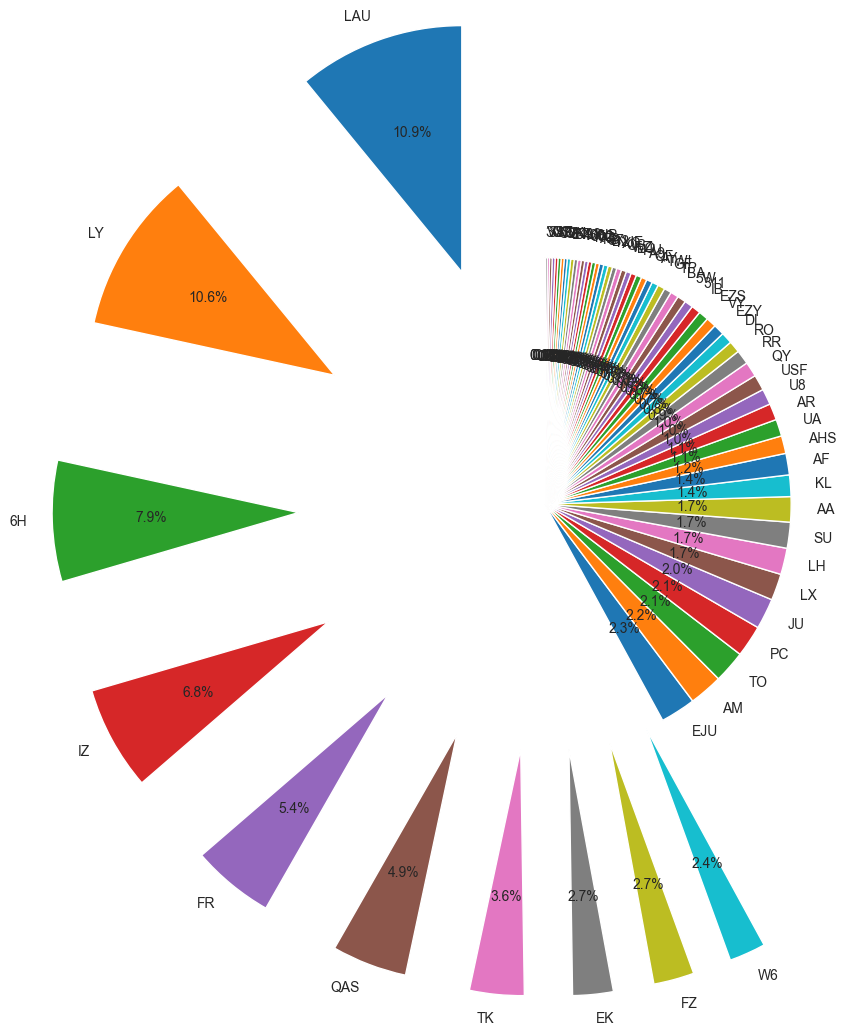

In [1141]:
plt.figure(figsize=(20,8))
plt.pie(x = 'Airl%Delay', data = airline_delay, labels='Airline', autopct='%.1f%%', explode=(1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0), 
       startangle = 90)
plt.show()

In [501]:
# For each Airline from TOP10 airlines with the biggest share of delays of all delayed flights, let's find the share of delays of all departed flights of this Airline:

In [1142]:
perc_airline_delay = final[final['Airline'].isin(top10AirlinesDelay['Airline'])] # all flights for TOP10 delaying Airlines saved in a new dataframe

In [1143]:
perc_airline_delay = perc_airline_delay[perc_airline_delay['Status'] == 'DEPARTED'] # filter by status 'DEPARTED'

In [1144]:
perc_airline_delay.head() # only departured flights operated by the TOP10 delaying Airlines

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,City,Country,Terminal,Status,TotalDelay,TotalDelayMins
7,LAU,9HSIS,2022-03-07 17:00:00,2022-03-07 17:15:00,D,WAW,WARSAW,POLAND,3,DEPARTED,-1 days +23:45:00,-15.0
12,LY,2373,2022-03-07 17:20:00,2022-03-07 17:35:00,D,BER,BERLIN,GERMANY,3,DEPARTED,-1 days +23:45:00,-15.0
13,LY,691,2022-03-07 16:05:00,2022-03-07 17:35:00,D,TBS,TBILISI,GEORGIA,3,DEPARTED,-1 days +22:30:00,-90.0
19,LY,397,2022-03-07 17:35:00,2022-03-07 17:45:00,D,MAD,MADRID,SPAIN,3,DEPARTED,-1 days +23:50:00,-10.0
20,FR,2006,2022-03-07 17:30:00,2022-03-07 17:49:00,D,BGY,BERGAMO,ITALY,3,DEPARTED,-1 days +23:41:00,-19.0


In [1145]:
perc_airline_delay.shape

(142, 12)

In [1146]:
all_dep_flights_by_airline = perc_airline_delay.value_counts(['Airline']).reset_index() # all departed flights for all airlines from top10 

In [1147]:
all_dep_flights_by_airline

,Airline,0
0,LY,49
1,6H,21
2,FR,19
3,IZ,13
4,TK,13
5,LAU,8
6,QAS,7
7,EK,4
8,FZ,4
9,W6,4


In [1148]:
newTop10AirlinesDelay = pd.merge(top10AirlinesDelay, all_dep_flights_by_airline, on='Airline') # merging quantity of fligths to the Top10 dataframe

In [1149]:
newTop10AirlinesDelay

,Airline,TotalDelayMins,Airl%Delay,0
0,LAU,-860.0,10.93,8
1,LY,-838.0,10.65,49
2,6H,-626.0,7.95,21
3,IZ,-536.0,6.81,13
4,FR,-425.0,5.40,19
5,QAS,-387.0,4.92,7
6,TK,-282.0,3.58,13
7,EK,-209.0,2.66,4
8,FZ,-209.0,2.66,4
9,W6,-188.0,2.39,4


In [1150]:
delayed_flights_by_airline = perc_airline_delay[perc_airline_delay['TotalDelayMins'] < 0].value_counts(['Airline']).reset_index() # only delayed flights for all airlines from top10 

In [1151]:
delayed_flights_by_airline

,Airline,0
0,LY,49
1,6H,21
2,FR,19
3,IZ,13
4,TK,11
5,LAU,5
6,QAS,5
7,EK,4
8,FZ,4
9,W6,4


In [1152]:
newTop10AirlinesDelay = pd.merge(newTop10AirlinesDelay, delayed_flights_by_airline, on='Airline') # merging quantity of delayed fligths to the Top10 dataframe

In [1153]:
newTop10AirlinesDelay

,Airline,TotalDelayMins,Airl%Delay,0_x,0_y
0,LAU,-860.0,10.93,8,5
1,LY,-838.0,10.65,49,49
2,6H,-626.0,7.95,21,21
3,IZ,-536.0,6.81,13,13
4,FR,-425.0,5.40,19,19
5,QAS,-387.0,4.92,7,5
6,TK,-282.0,3.58,13,11
7,EK,-209.0,2.66,4,4
8,FZ,-209.0,2.66,4,4
9,W6,-188.0,2.39,4,4


In [1154]:
newTop10AirlinesDelay = newTop10AirlinesDelay.astype({'0_x': int,'0_y': int})

In [1155]:
newTop10AirlinesDelay['PercDelay'] = round(newTop10AirlinesDelay['0_y'] / newTop10AirlinesDelay['0_x'] * 100) # % delayed flights of all departed flights

In [1156]:
newTop10AirlinesDelay['AvgDelayPerFlight'] = round(newTop10AirlinesDelay['TotalDelayMins'] / newTop10AirlinesDelay['0_x'] * 100) # average delay time on 1 flight 

In [1157]:
newTop10AirlinesDelay

,Airline,TotalDelayMins,Airl%Delay,0_x,0_y,PercDelay,AvgDelayPerFlight
0,LAU,-860.0,10.93,8,5,62.0,-10750.0
1,LY,-838.0,10.65,49,49,100.0,-1710.0
2,6H,-626.0,7.95,21,21,100.0,-2981.0
3,IZ,-536.0,6.81,13,13,100.0,-4123.0
4,FR,-425.0,5.40,19,19,100.0,-2237.0
5,QAS,-387.0,4.92,7,5,71.0,-5529.0
6,TK,-282.0,3.58,13,11,85.0,-2169.0
7,EK,-209.0,2.66,4,4,100.0,-5225.0
8,FZ,-209.0,2.66,4,4,100.0,-5225.0
9,W6,-188.0,2.39,4,4,100.0,-4700.0


In [1158]:
newTop10AirlinesDelay.rename(columns={'0_x':'QtyDepartedFlights', '0_y':'QtyDelayedFlights'})

,Airline,TotalDelayMins,Airl%Delay,QtyDepartedFlights,QtyDelayedFlights,PercDelay,AvgDelayPerFlight
0,LAU,-860.0,10.93,8,5,62.0,-10750.0
1,LY,-838.0,10.65,49,49,100.0,-1710.0
2,6H,-626.0,7.95,21,21,100.0,-2981.0
3,IZ,-536.0,6.81,13,13,100.0,-4123.0
4,FR,-425.0,5.40,19,19,100.0,-2237.0
5,QAS,-387.0,4.92,7,5,71.0,-5529.0
6,TK,-282.0,3.58,13,11,85.0,-2169.0
7,EK,-209.0,2.66,4,4,100.0,-5225.0
8,FZ,-209.0,2.66,4,4,100.0,-5225.0
9,W6,-188.0,2.39,4,4,100.0,-4700.0


**Columns reminder**:
1. _'Airl%Delay'_ - percent of particular airline in overall time of delays 
2. _'QtyDepartedFlights'_ - quantity of all flights of particular airline in status 'DEPARTED'
3. _'QtyDelayedFlights'_ - quantity of flights of particular airline in status 'DEPARTED', which been delayed
4. _'PercDelay'_ - percent of delays of particular airline relating to all departed flights of this airline
5. _AvgDelayPerFlight_ - average minutes delay per one departed flight 

**Conclusions:**

1. the airlines, which have the biggest part in overall delays, are: LAU (10.9%), LY (10.6%) and 6H (7.9%)
2. most of the top10 airlines, which provide the highest delays, delay almost every flight they operate. 
3. LAU airline delayed only 62% of their flights, while average time of delay per flight for this airline is the most critical.

## Terminals:

In [1159]:
departed_delayed.Terminal.unique() # value = '3' appears in the 'Terminal' column as int and as string. First let's fix it

array([3, 1, '3'], dtype=object)

In [1160]:
departed_delayed[~departed_delayed.Terminal.isin([1,3])]

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,City,Country,Terminal,Status,TotalDelay,TotalDelayMins
658,AY,1980,2023-02-17 23:55:00,2023-02-18 00:16:00,D,HEL,HELSINKI,FINLAND,3,DEPARTED,-1 days +23:39:00,-21.0
659,CY,111,2023-02-18 14:10:00,2023-02-18 14:25:00,D,LCA,LARNACA,CYPRUS,3,DEPARTED,-1 days +23:45:00,-15.0
660,RR,9506,2023-02-18 15:50:00,2023-02-18 17:03:00,D,WRO,WROCLAW,POLAND,3,DEPARTED,-1 days +22:47:00,-73.0
661,WZ,016,2023-02-18 16:55:00,2023-02-18 17:21:00,D,MRV,MINERALNYE VODY,RUSSIAN FEDERATION,3,DEPARTED,-1 days +23:34:00,-26.0


In [1161]:
final[final['Status'] == 'DEPARTED'].Terminal.unique()

array([3, 1, '3'], dtype=object)

In [1162]:
final['Terminal'] = pd.to_numeric(final['Terminal']) # Trying to fix datatype of the 'Terminal' column

In [1163]:
final[final['Status'] == 'DEPARTED'].Terminal.unique()

array([3, 1], dtype=int64)

In [1164]:
departed = final[final['Status'] == 'DEPARTED']

In [1165]:
departed_delayed = departed[departed.TotalDelayMins < 0]

In [1166]:
departed_delayed.Terminal.unique() # datatype is fixed

array([3, 1], dtype=int64)

<AxesSubplot: xlabel='TotalDelayMins', ylabel='Count'>

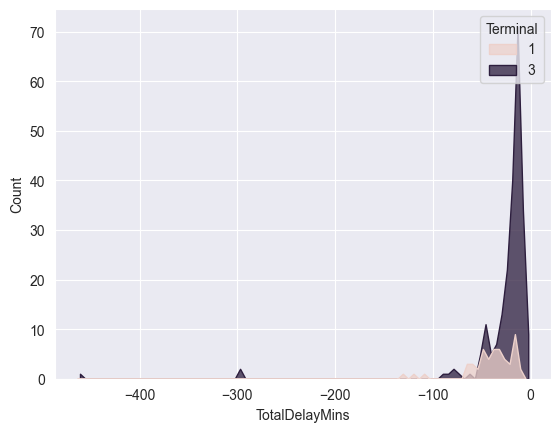

In [1167]:
sb.histplot(data=departed_delayed, x = 'TotalDelayMins', hue='Terminal', element='poly', multiple = 'dodge')

**Conclusions:**

the majority of delay cases, as well as the biggest amount of time of delays are observed in Terminal = 3

## Date:

In [1168]:
final.agg({'ActualTime':min, 'ActualTime':max, 'PlanTime':min, 'PlanTime':max})

ActualTime   2023-02-18 17:21:00
PlanTime     2023-02-18 16:55:00
dtype: datetime64[ns]

Since we have the data available for 1 day only, let's try to research, at what hours more delays occur. 

For that purpose let's extract 'hour' from the 'ActualTime' column.

In [1169]:
final.ActualTime.info()

<class 'pandas.core.series.Series'>
RangeIndex: 662 entries, 0 to 661
Series name: ActualTime
Non-Null Count  Dtype         
--------------  -----         
662 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.3 KB


In [1170]:
final['Hour'] = pd.DatetimeIndex(final['ActualTime']).hour.astype(int)

In [1171]:
final

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,City,Country,Terminal,Status,TotalDelay,TotalDelayMins,Hour
0,LY,842,2022-03-07 16:00:00,2022-03-07 17:04:00,A,LGG,LIEGE,BELGIUM,3,LANDED,-1 days +22:56:00,-64.0,17
1,AA,146,2022-03-07 17:15:00,2022-03-07 17:05:00,A,JFK,NEW YORK,UNITED STATES,3,LANDED,0 days 00:10:00,10.0,17
2,USF,RCH18,2022-03-07 17:15:00,2022-03-07 17:05:00,D,RMS,RAMSTEIN,GERMANY,3,CANCELED,0 days 00:10:00,10.0,17
3,AHS,N120L,2022-03-07 16:30:00,2022-03-07 17:08:00,D,TEB,TETERBORO,UNITED STATES,3,DEPARTED,-1 days +23:22:00,-38.0,17
4,LH,687,2022-03-07 16:25:00,2022-03-07 17:09:00,D,FRA,FRANKFURT,GERMANY,3,DEPARTED,-1 days +23:16:00,-44.0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,LAU,N800T,2022-03-09 11:00:00,2022-03-08 06:36:00,D,BAH,BAHRAIN,BAHRAIN,3,DEPARTED,1 days 04:24:00,1704.0,6
658,AY,1980,2023-02-17 23:55:00,2023-02-18 00:16:00,D,HEL,HELSINKI,FINLAND,3,DEPARTED,-1 days +23:39:00,-21.0,0
659,CY,111,2023-02-18 14:10:00,2023-02-18 14:25:00,D,LCA,LARNACA,CYPRUS,3,DEPARTED,-1 days +23:45:00,-15.0,14
660,RR,9506,2023-02-18 15:50:00,2023-02-18 17:03:00,D,WRO,WROCLAW,POLAND,3,DEPARTED,-1 days +22:47:00,-73.0,17


In [1172]:
departed = final[final['Status'] == 'DEPARTED']

In [1173]:
departed_delayed = departed[departed.TotalDelayMins < 0]

In [1179]:
departed_delayed['PosTotalDelayMins'] = -(final['TotalDelayMins'] )

C:\Users\97253\AppData\Local\Temp\ipykernel_100100\2053476664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  departed_delayed['PosTotalDelayMins'] = -(final['TotalDelayMins'] )


In [1180]:
departed_delayed.head()

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,City,Country,Terminal,Status,TotalDelay,TotalDelayMins,Hour,PosTotalDelayMins
3,AHS,N120L,2022-03-07 16:30:00,2022-03-07 17:08:00,D,TEB,TETERBORO,UNITED STATES,3,DEPARTED,-1 days +23:22:00,-38.0,17,38.0
4,LH,687,2022-03-07 16:25:00,2022-03-07 17:09:00,D,FRA,FRANKFURT,GERMANY,3,DEPARTED,-1 days +23:16:00,-44.0,17,44.0
7,LAU,9HSIS,2022-03-07 17:00:00,2022-03-07 17:15:00,D,WAW,WARSAW,POLAND,3,DEPARTED,-1 days +23:45:00,-15.0,17,15.0
8,460,4XCMC,2022-03-07 17:00:00,2022-03-07 17:18:00,D,BCM,BACAU,ROMANIA,3,DEPARTED,-1 days +23:42:00,-18.0,17,18.0
12,LY,2373,2022-03-07 17:20:00,2022-03-07 17:35:00,D,BER,BERLIN,GERMANY,3,DEPARTED,-1 days +23:45:00,-15.0,17,15.0


In [1176]:
import matplotlib.pyplot as plt
import matplotlib.patches as mp

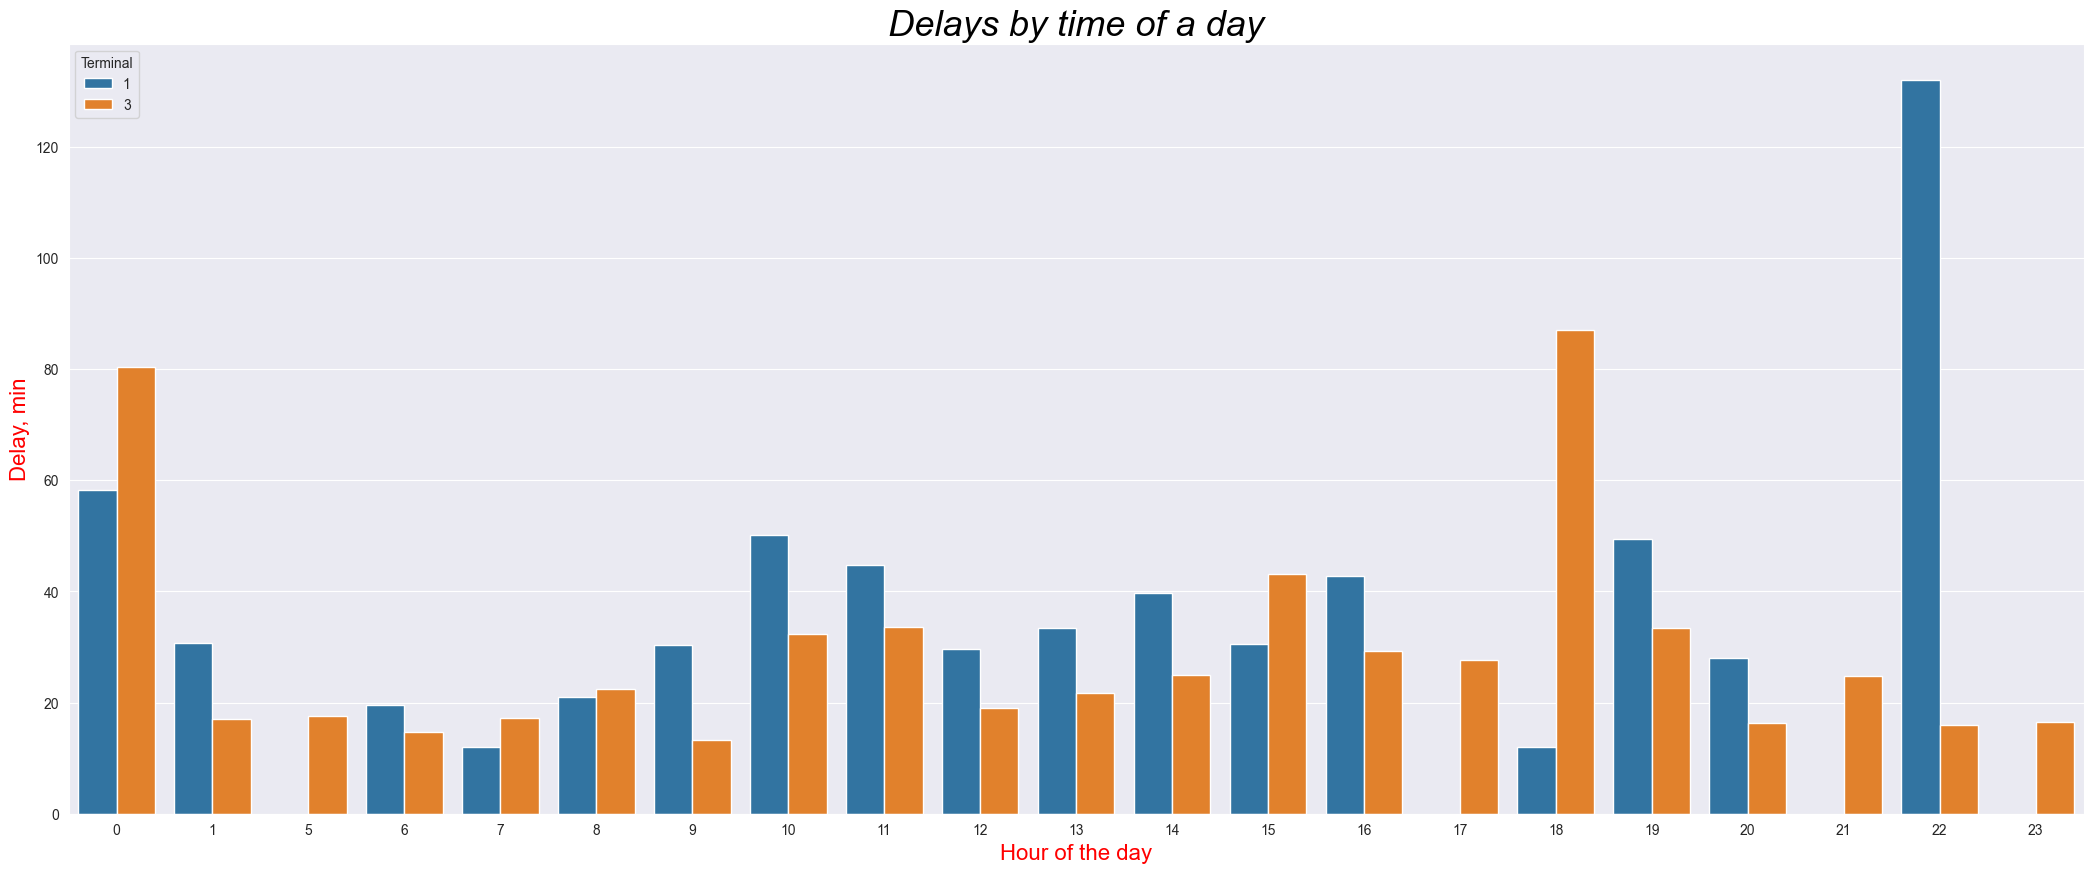

In [1181]:
plt.figure(figsize = (26,10))
sb.set_style('darkgrid')
sb.barplot(data=departed_delayed,x='Hour',y='PosTotalDelayMins', hue='Terminal', errorbar=('ci', 0))
plt.title('Delays by time of a day',fontdict={'fontsize':26, 'color':'black', 'style':'oblique'})
plt.xlabel('Hour of the day',fontdict={'fontsize':16, 'color':'red'})
plt.ylabel('Delay, min',fontdict={'fontsize':16, 'color':'red'})
plt.show()

In [1182]:
final.Hour.unique()

array([17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16], dtype=int64)

In [1183]:
all_dep_flights_by_hour = final[final['Status']=='DEPARTED'].value_counts(['Hour']).reset_index() # all departed flights at hour

In [1184]:
all_dep_flights_by_hour.sort_values(by='Hour')

,Hour,0
14,0,11
12,1,14
15,5,10
2,6,21
9,7,16
5,8,18
0,9,26
6,10,18
11,11,14
3,12,19


In [1185]:
final = final[final['Status']=='DEPARTED']

In [1186]:
delayed_dep_flights_by_hour = final[final['TotalDelayMins'] <0].value_counts(['Hour']).reset_index() # delayed flights by hours

In [1187]:
delayed_dep_flights_by_hour.sort_values(by='Hour')

,Hour,0
13,0,11
11,1,14
14,5,10
3,6,19
9,7,15
7,8,16
1,9,23
5,10,17
12,11,12
4,12,18


In [1188]:
delay_by_hours = pd.merge(all_dep_flights_by_hour, delayed_dep_flights_by_hour, on='Hour')

In [1189]:
delay_by_hours.sort_values(by='Hour')

,Hour,0_x,0_y
14,0,11,11
12,1,14,14
15,5,10,10
2,6,21,19
9,7,16,15
5,8,18,16
0,9,26,23
6,10,18,17
11,11,14,12
3,12,19,18


In [1194]:
delay_by_hours['PercDelay'] = round(delay_by_hours['0_y'] / delay_by_hours['0_x'] * 100) # % delayed flights of all departed flights at this hour

In [1195]:
delay_by_hours = delay_by_hours.sort_values(by='Hour')

In [1196]:
delay_by_hours

,Hour,0_x,0_y,PercDelay
14,0,11,11,100.0
12,1,14,14,100.0
15,5,10,10,100.0
2,6,21,19,90.0
9,7,16,15,94.0
5,8,18,16,89.0
0,9,26,23,88.0
6,10,18,17,94.0
11,11,14,12,86.0
3,12,19,18,95.0


In [1197]:
delay_by_hours.rename(columns={'0_y':'QtyDepartedFlights', '0_x':'QtyDelayedFlights'})

,Hour,QtyDelayedFlights,QtyDepartedFlights,PercDelay
14,0,11,11,100.0
12,1,14,14,100.0
15,5,10,10,100.0
2,6,21,19,90.0
9,7,16,15,94.0
5,8,18,16,89.0
0,9,26,23,88.0
6,10,18,17,94.0
11,11,14,12,86.0
3,12,19,18,95.0


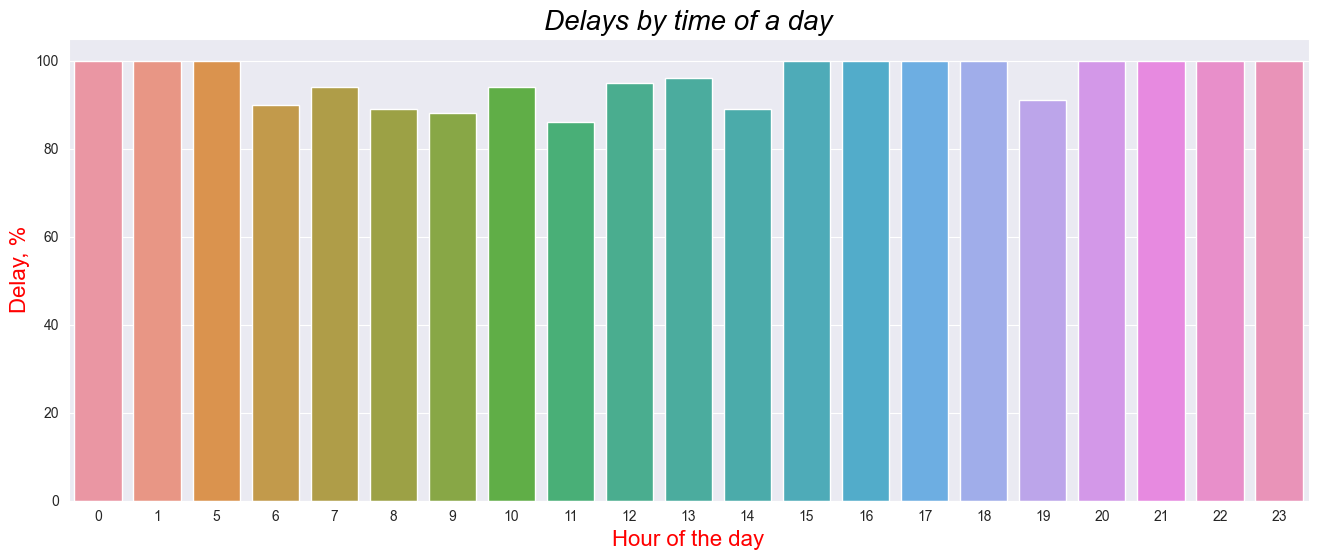

In [1198]:
plt.figure(figsize = (16,6))
sb.set_style('darkgrid')
sb.barplot(data=delay_by_hours,x='Hour',y='PercDelay', errorbar=('ci', 0))
plt.title('Delays by time of a day',fontdict={'fontsize':20, 'color':'black', 'style':'oblique'})
plt.xlabel('Hour of the day',fontdict={'fontsize':16, 'color':'red'})
plt.ylabel('Delay, %',fontdict={'fontsize':16, 'color':'red'})
plt.show()

In [1201]:
departed_delayed = departed_delayed[departed_delayed['Airline'].isin(top10AirlinesDelay['Airline'])]

<AxesSubplot: xlabel='Hour', ylabel='PosTotalDelayMins'>

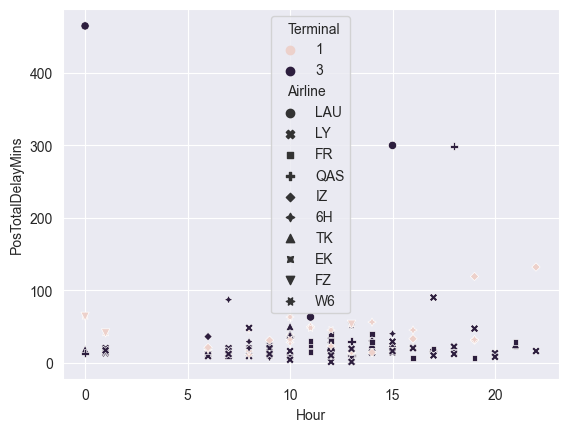

In [1203]:
sb.scatterplot(data=departed_delayed,x='Hour',y='PosTotalDelayMins', hue = 'Terminal', style = 'Airline')

In [1207]:
# Is it okay to rid of the 3 highest extremum values, so that the graph looks better without them? 
# In my opinion, in these 3 cases with the highest amount of time delay, something extraordinary happend (emergency?). 

**Conclusions:**

1. The highest delays in amount of time are observed at around 22:00 in terminal 1 and at 18:00 and 00:00 in terminal 3
2. The majority of the flights were delayed. The lowest delay cases were at approximately 08:00, 09:00, 11:00 and 14:00. 
3. At 2:00, 3:00 and 4:00 there were no flights.